# About Dataset

#### The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

## Attribute information

**Invoice id:** Computer generated sales slip invoice identification number

**Branch:** Branch of supercenter (3 branches are available identified by A, B and C).

**City:** Location of supercenters

**Customer type:** Type of customers, recorded by Members for customers using member card and Normal for without member card.

**Gender:** Gender type of customer

**Product line:** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

**Unit price:** Price of each product in dollars

**Quantity:** Number of products purchased by customer

**Tax:** 5% tax fee for customer buying

**Total:** Total price including tax

**Date:** Date of purchase (Record available from January 2019 to March 2019)

**Time:** Purchase time (10am to 9pm)

**Payment:** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

**COGS:** Cost of goods sold

**Gross margin percentage:** Gross margin percentage

**Gross income:** Gross income

**Rating:** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

# Problem Statement:

### Explore which purchasing habits differentiate Males and Females apart. From this, how successful will the model created be in predicting whether a customer is a Male of Female?

### For each variable that distinguishes male and female customers, we will try to explore the rationnale behind it to gain forther insights.

# Import Library

In [127]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [128]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.datasets import load_iris
sb.set() # set the default Seaborn style for graphics
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
import plotly.offline as py
import plotly.graph_objs as go
from plotly import subplots

In [129]:
#Supermarket Dataset to be df1
df1 = pd.read_csv('supermarket.csv')

#### Look at sample data & Check the data type of Supermarket Dataset

In [130]:
df1.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [131]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# Cleaning of Data for Supermarket Dataset (df1)

#### Drop unnecessary columns

In [132]:
df1 = df1.drop(['gross margin percentage', 'Branch'], axis = 1)
#We are dropping branch because it is the same as City

#### Standardise capitalisation of first letter of each variable & relabelling

In [133]:
df1 = df1.rename(columns={'cogs': 'Total cost'})
df1 = df1.rename(columns={'gross income': 'Gross income'})

#### Check if any Null Value exists

In [134]:
df1.isna().sum()

Invoice ID       0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
Total cost       0
Gross income     0
Rating           0
dtype: int64

#### Inspect Categorical Data-See how many unique values are there

In [135]:
df1.select_dtypes('object').nunique()

Invoice ID       1000
City                3
Customer type       2
Gender              2
Product line        6
Date               89
Time              506
Payment             3
dtype: int64

#### Transform 'Time' to hours in decimal (so that it will be in int64)

In [136]:
time1 = pd.DatetimeIndex(df1['Time'])
df1['Time'] = time1.hour + (time1.minute/60)
df1

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Total cost,Gross income,Rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13.133333,Ewallet,522.83,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10.483333,Cash,76.40,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13.383333,Credit card,324.31,16.2155,7.4
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20.550000,Ewallet,465.76,23.2880,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10.616667,Ewallet,604.17,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13.766667,Ewallet,40.35,2.0175,6.2
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17.266667,Ewallet,973.80,48.6900,4.4
997,727-02-1313,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13.366667,Cash,31.84,1.5920,7.7
998,347-56-2442,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15.550000,Cash,65.82,3.2910,4.1


**Converting Date to Day of Week**

In [137]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date'] = df1['Date'].dt.day_of_week
df1 = df1.rename(columns={'Date': 'Day'})

Numbers in 'Day' column refers to 0 = Monday all the way to 6 = Sunday.

#### Check dataset if all conversions are done

In [138]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Tax 5%         1000 non-null   float64
 8   Total          1000 non-null   float64
 9   Day            1000 non-null   int64  
 10  Time           1000 non-null   float64
 11  Payment        1000 non-null   object 
 12  Total cost     1000 non-null   float64
 13  Gross income   1000 non-null   float64
 14  Rating         1000 non-null   float64
dtypes: float64(7), int64(2), object(6)
memory usage: 117.3+ KB


In [139]:
df1

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Day,Time,Payment,Total cost,Gross income,Rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,5,13.133333,Ewallet,522.83,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,4,10.483333,Cash,76.40,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,6,13.383333,Credit card,324.31,16.2155,7.4
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,6,20.550000,Ewallet,465.76,23.2880,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,4,10.616667,Ewallet,604.17,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1,13.766667,Ewallet,40.35,2.0175,6.2
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,5,17.266667,Ewallet,973.80,48.6900,4.4
997,727-02-1313,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,5,13.366667,Cash,31.84,1.5920,7.7
998,347-56-2442,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,4,15.550000,Cash,65.82,3.2910,4.1


#### Check for outliers for numerical variables

In [140]:
# Extract only the numeric data variables
numeric_data = df1[["Tax 5%", "Total", "Total cost", "Gross income", "Unit price", "Quantity", "Time", "Rating"]]

# Summary Statistics for all Variables
numeric_data.describe()

,Tax 5%,Total,Total cost,Gross income,Unit price,Quantity,Time,Rating
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,15.379369,322.966749,307.58738,15.379369,55.672130,5.510000,15.411633,6.97270
std,11.708825,245.885335,234.17651,11.708825,26.494628,2.923431,3.192130,1.71858
min,0.508500,10.678500,10.17000,0.508500,10.080000,1.000000,10.000000,4.00000
25%,5.924875,124.422375,118.49750,5.924875,32.875000,3.000000,12.716667,5.50000
50%,12.088000,253.848000,241.76000,12.088000,55.230000,5.000000,15.316667,7.00000
75%,22.445250,471.350250,448.90500,22.445250,77.935000,8.000000,18.250000,8.50000
max,49.650000,1042.650000,993.00000,49.650000,99.960000,10.000000,20.983333,10.00000


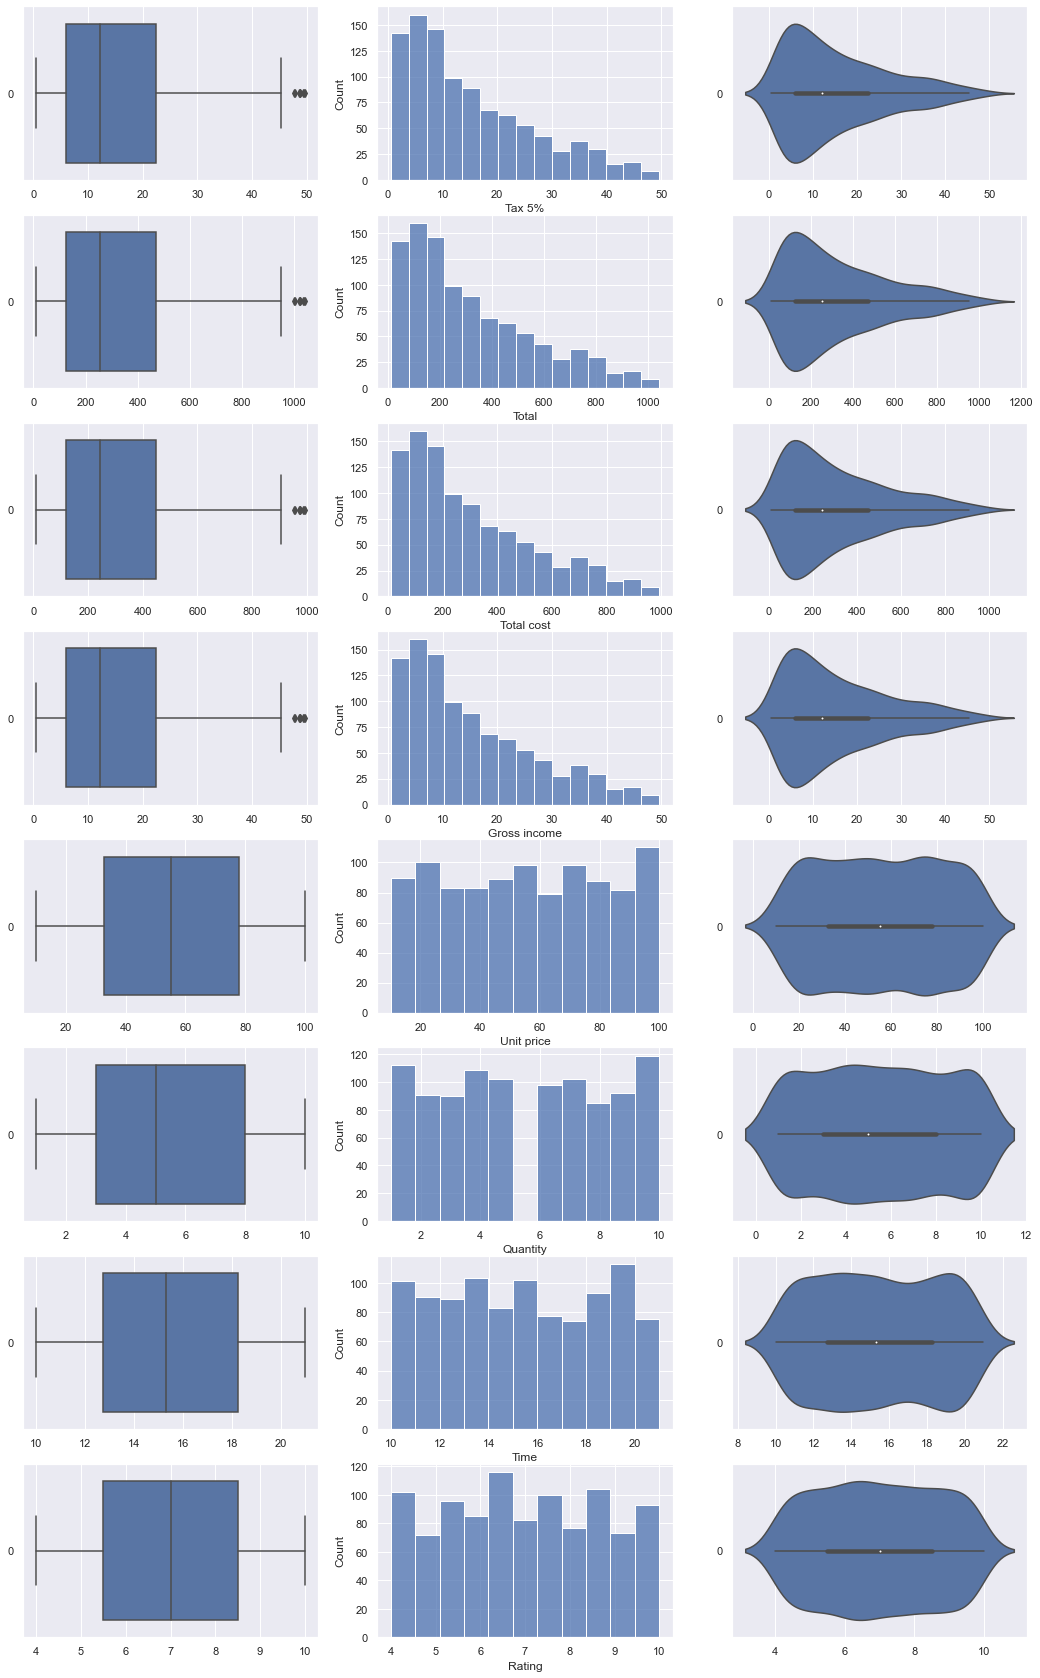

In [141]:
# Draw the distributions of all variables
f, axes = plt.subplots(8, 3, figsize=(18, 30))

count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

As you can see from the visualisations above, the first 4 variables ("Tax 5%", "Total", "Total cost", "Gross income") have the same shape for their graphs. This shows that they are based on the same variable of money spent in the supermarket. This makes sense because total refers to cost of goods (Total cost) after tax and tax is also based on the total cost. Gross income in this case will then refer to the supermarket's income, and not the individual's income.

**Hence, we will drop the remaining 3 variables and only keep "Total"**

In [142]:
df1 = df1.drop(['Tax 5%', 'Total cost', 'Gross income'], axis = 1)

In [143]:
df1

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Day,Time,Payment,Rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,5,13.133333,Ewallet,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,4,10.483333,Cash,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,6,13.383333,Credit card,7.4
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,6,20.550000,Ewallet,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,4,10.616667,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Naypyitaw,Normal,Male,Health and beauty,40.35,1,42.3675,1,13.766667,Ewallet,6.2
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,1022.4900,5,17.266667,Ewallet,4.4
997,727-02-1313,Yangon,Member,Male,Food and beverages,31.84,1,33.4320,5,13.366667,Cash,7.7
998,347-56-2442,Yangon,Normal,Male,Home and lifestyle,65.82,1,69.1110,4,15.550000,Cash,4.1


It can also be seen that there are no possible outliers for Unit price, Quantity, Time and Rating based on the above box plots. So, we are only removing from Total. (should there be an outlier).

We will use 3x standard deviation to identify our outliers.

In [144]:
highest_allowed = (df1['Total'].mean() + 3*df1['Total'].std())
lowest_allowed = (df1['Total'].mean() - 3*df1['Total'].std())
print("Highest allowed", highest_allowed)
print("Lowest allowed", lowest_allowed)

Highest allowed 1060.6227543029163
Lowest allowed -414.6892563029162


In [145]:
print(np.where(df1['Total']>1060.6227543029163))
print(np.where(df1['Total']<-414.6892563029162))

(array([], dtype=int64),)
(array([], dtype=int64),)


Outliers: Since the array shows an empty array, it means that there were **no outliers detected**, and hence no datasets were removed.

# Dividing into two datasets (Male & Female)

In [146]:
male = df1.loc[df1['Gender'] == 'Male']
female = df1.loc[df1['Gender'] == 'Female']

In [147]:
male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 2 to 998
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     499 non-null    object 
 1   City           499 non-null    object 
 2   Customer type  499 non-null    object 
 3   Gender         499 non-null    object 
 4   Product line   499 non-null    object 
 5   Unit price     499 non-null    float64
 6   Quantity       499 non-null    int64  
 7   Total          499 non-null    float64
 8   Day            499 non-null    int64  
 9   Time           499 non-null    float64
 10  Payment        499 non-null    object 
 11  Rating         499 non-null    float64
dtypes: float64(4), int64(2), object(6)
memory usage: 50.7+ KB


In [148]:
female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     501 non-null    object 
 1   City           501 non-null    object 
 2   Customer type  501 non-null    object 
 3   Gender         501 non-null    object 
 4   Product line   501 non-null    object 
 5   Unit price     501 non-null    float64
 6   Quantity       501 non-null    int64  
 7   Total          501 non-null    float64
 8   Day            501 non-null    int64  
 9   Time           501 non-null    float64
 10  Payment        501 non-null    object 
 11  Rating         501 non-null    float64
dtypes: float64(4), int64(2), object(6)
memory usage: 50.9+ KB


Datasets for male and female are balanced (both around 500 datasets). Hence, there is no need to balance out the data numbers.

## We do a last check to see if all ther conversions are done

In [149]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Total          1000 non-null   float64
 8   Day            1000 non-null   int64  
 9   Time           1000 non-null   float64
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 93.9+ KB


# Start of EDA

## Categorical Variable

### Product Line comparison between Males & Females

In [150]:
print("Male:")
print(male["Product line"].value_counts())
print()
print("Female:")
print(female["Product line"].value_counts())

Male:
Health and beauty         88
Electronic accessories    86
Food and beverages        84
Fashion accessories       82
Home and lifestyle        81
Sports and travel         78
Name: Product line, dtype: int64

Female:
Fashion accessories       96
Food and beverages        90
Sports and travel         88
Electronic accessories    84
Home and lifestyle        79
Health and beauty         64
Name: Product line, dtype: int64


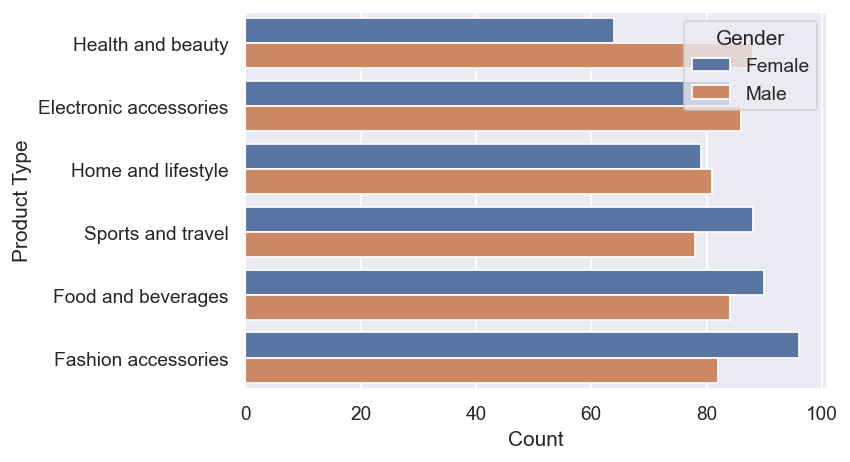

In [151]:
plt.figure(dpi=125)
sb.countplot(y ='Product line', hue = "Gender", data = df1) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

### Interactive chart for Product Line Comparison

In [152]:
#This shows the relationship between the timing and the ratings and it is diffrentiated by gender of the customer
#Need to pip install vega_datasets
import altair as alt
from vega_datasets import data

source = df1

brush = alt.selection(type='interval')

points = alt.Chart(source).mark_point().encode(
    x='Total',
    y='Day',
    color=alt.condition(brush, 'Gender:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(source).mark_bar().encode(
    y='Gender:N',
    color='Gender:N',
    x='count(Gender):Q'
).transform_filter(
    brush
)

points & bars

alt.VConcatChart(...)

### Payment Method comparison between Males & Females

In [153]:
print("Male:")
print(male["Payment"].value_counts())
print()
print("Female:")
print(female["Payment"].value_counts())

Male:
Ewallet        185
Cash           166
Credit card    148
Name: Payment, dtype: int64

Female:
Cash           178
Credit card    163
Ewallet        160
Name: Payment, dtype: int64


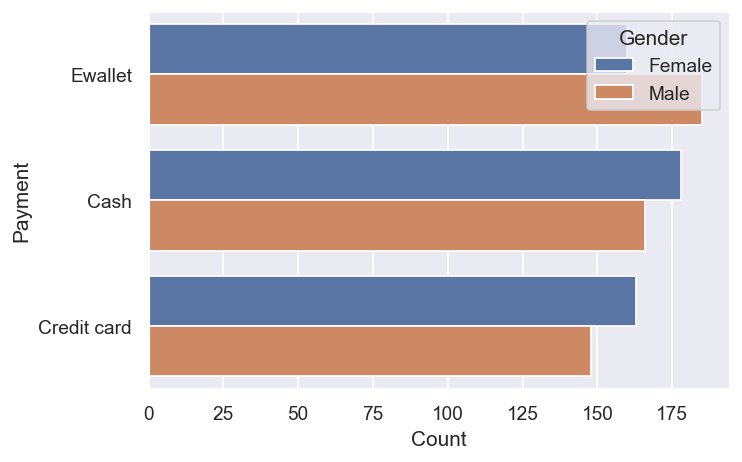

In [154]:
plt.figure(dpi=125)
sb.countplot(y ='Payment', hue = "Gender", data = df1) 
plt.xlabel('Count')
plt.ylabel('Payment')
plt.show()

### City comparison between Males & Females

In [155]:
print("Male:")
print(male["City"].value_counts())
print()
print("Female:")
print(female["City"].value_counts())

Male:
Yangon       179
Mandalay     170
Naypyitaw    150
Name: City, dtype: int64

Female:
Naypyitaw    178
Mandalay     162
Yangon       161
Name: City, dtype: int64


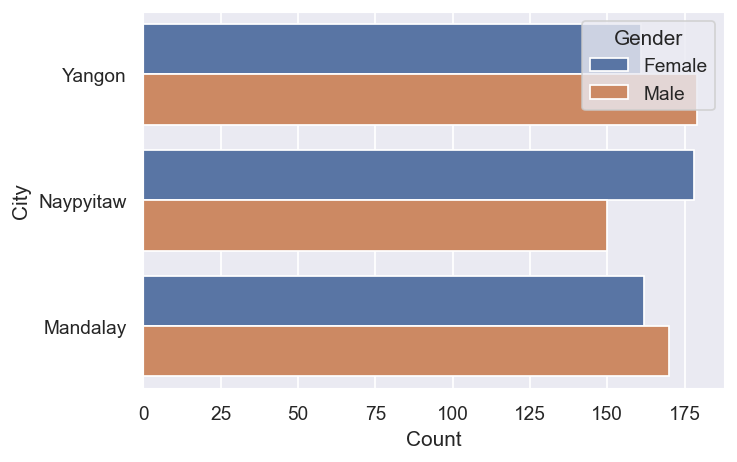

In [156]:
plt.figure(dpi=125)
sb.countplot(y ='City', hue = "Gender", data = df1) 
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

### Customer Type comparison between Males & Females

In [157]:
print("Male:")
print(male["Customer type"].value_counts())
print()
print("Female:")
print(female["Customer type"].value_counts())

Male:
Normal    259
Member    240
Name: Customer type, dtype: int64

Female:
Member    261
Normal    240
Name: Customer type, dtype: int64


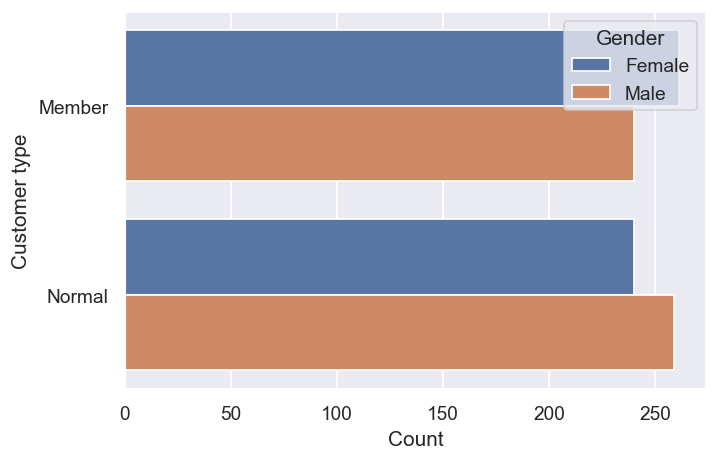

In [158]:
plt.figure(dpi=125)
sb.countplot(y ='Customer type', hue = "Gender", data = df1) 
plt.xlabel('Count')
plt.ylabel('Customer type')
plt.show()

### Day comparison between Males & Females
0 refers to Monday while 6 refers to Sunday

In [159]:
print("Male:")
print(male["Day"].value_counts())
print()
print("Female:")
print(female["Day"].value_counts())

Male:
2    79
5    77
3    75
4    74
1    71
6    66
0    57
Name: Day, dtype: int64

Female:
5    87
1    87
0    68
6    67
4    65
2    64
3    63
Name: Day, dtype: int64


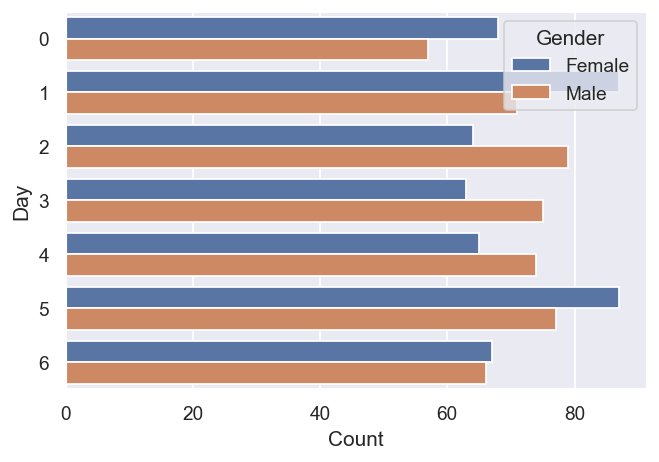

In [160]:
plt.figure(dpi=125)
sb.countplot(y ='Day', hue = "Gender", data = df1) 
plt.xlabel('Count')
plt.ylabel('Day')
plt.show()

## Numerical Variables

### Total Spending Comparison for Male & Female

In [161]:
# Create a joint dataframe by concatenating Total and Gender
total = df1['Total']
gender = df1['Gender']
totalDF = pd.concat([total, gender], axis = 1).reindex(total.index)
totalDF.describe()

,Total
count,1000.000000
mean,322.966749
std,245.885335
min,10.678500
25%,124.422375
50%,253.848000
75%,471.350250
max,1042.650000


<AxesSubplot:xlabel='Total', ylabel='Gender'>

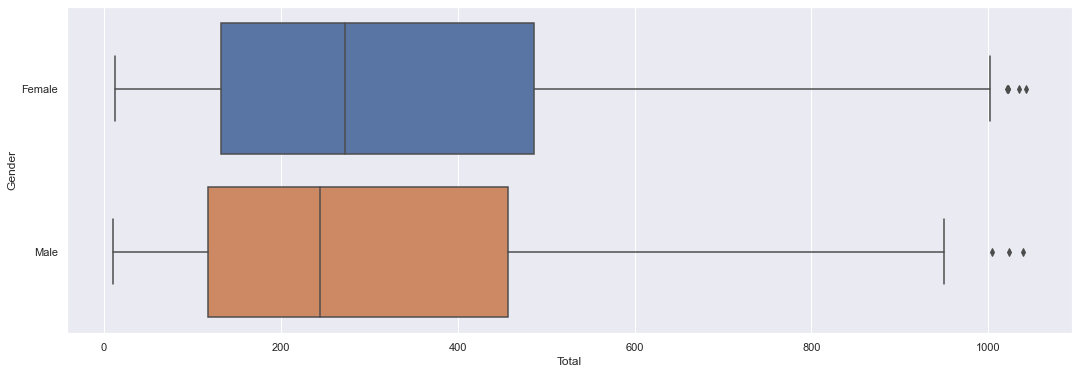

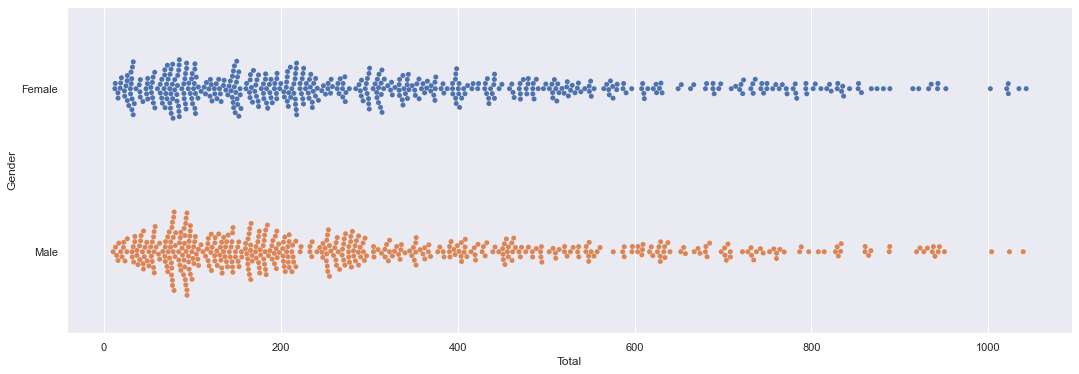

In [162]:
# Joint Boxplot of Total Train against Gender Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "Total", y = "Gender", data = totalDF,orient="h") #write x and y axis respectively
# Joint Swarmplot of Total Train against Gender Train
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x ="Total", y = "Gender", data = totalDF, orient = "h") #write x and y axis respectively

### Time comparison between Male & Female

In [163]:
# Create a joint dataframe by concatenating Time and Gender
time = df1['Time']
gender = df1['Gender']
timeDF = pd.concat([time, gender], axis = 1).reindex(time.index)

timeDF.describe()

,Time
count,1000.000000
mean,15.411633
std,3.192130
min,10.000000
25%,12.716667
50%,15.316667
75%,18.250000
max,20.983333


<AxesSubplot:xlabel='Time', ylabel='Gender'>

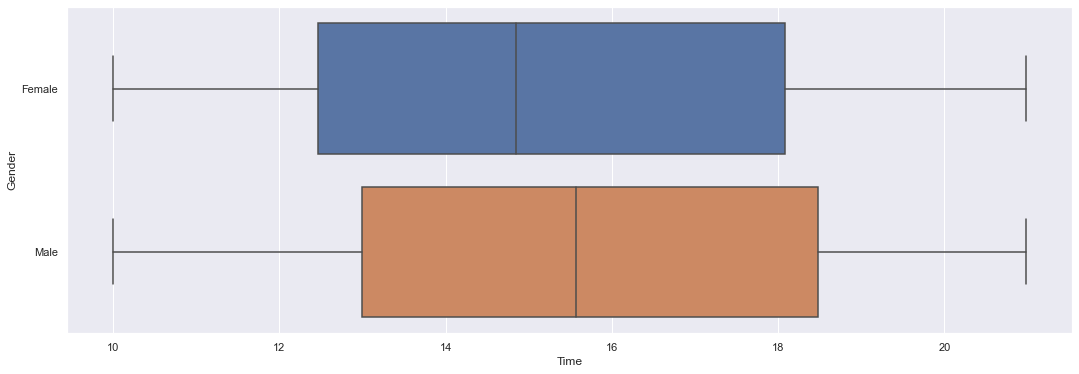

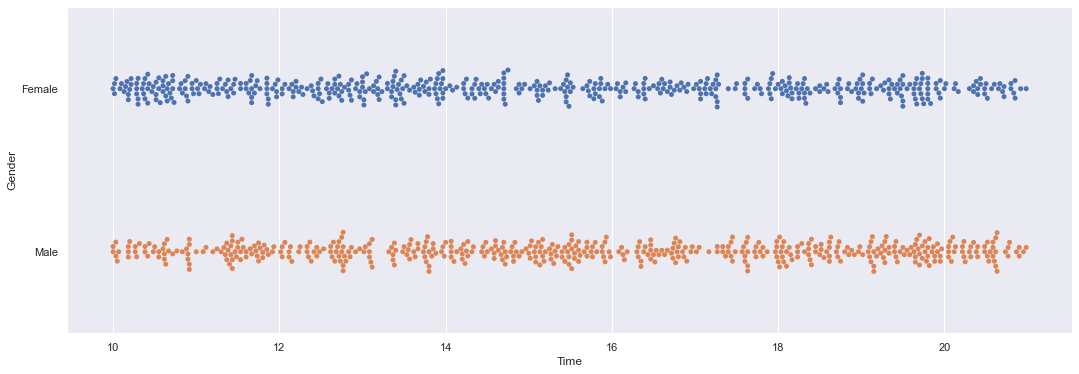

In [164]:
# Joint Boxplot of Time Train against Gender Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "Time", y = "Gender", data = timeDF, orient = "h") #write x and y axis respectively
# Joint Swarmplot of Time Train against Gender Train
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x ="Time", y = "Gender", data = timeDF, orient = "h") #write x and y axis respectively

### Ratings comparison between Male and Female

In [165]:
# Create a joint dataframe by concatenating Rating and Gender
rating = df1['Rating']
gender = df1['Gender']
ratingDF = pd.concat([rating, gender], axis = 1).reindex(rating.index)

ratingDF.describe()

,Rating
count,1000.00000
mean,6.97270
std,1.71858
min,4.00000
25%,5.50000
50%,7.00000
75%,8.50000
max,10.00000


<AxesSubplot:xlabel='Rating', ylabel='Gender'>

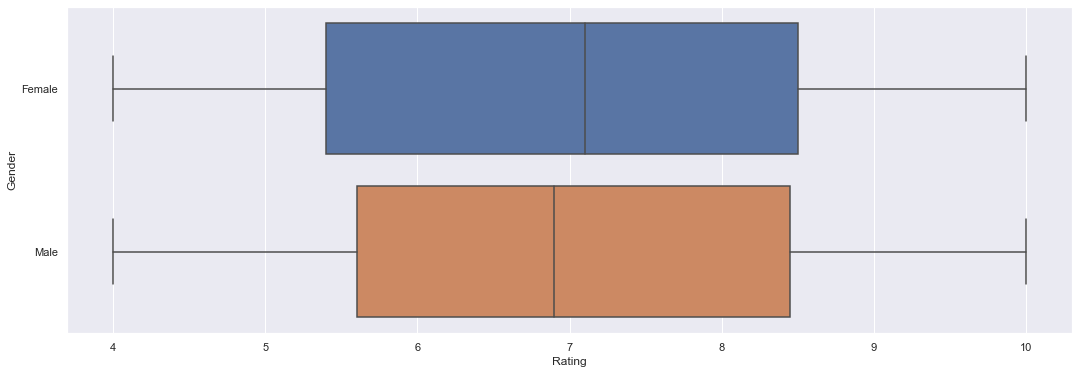

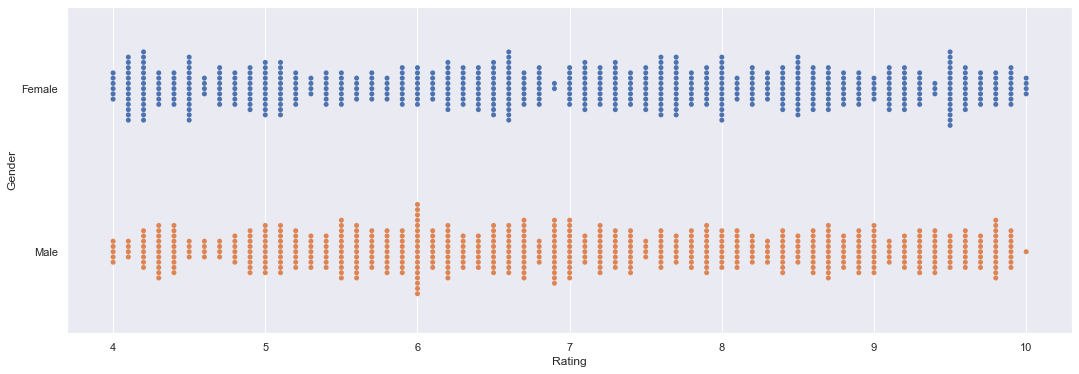

In [166]:
# Joint Boxplot of Rating Train against Gender Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "Rating", y = "Gender", data = ratingDF, orient = "h") #write x and y axis respectively
# Joint Swarmplot of Rating Train against Gender Train
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x ="Rating", y = "Gender", data = ratingDF, orient = "h") #write x and y axis respectively

### Quantity Comparison between Males & Females

In [167]:
# Create a joint dataframe by concatenating Quantity and Gender
quantity = df1['Quantity']
gender = df1['Gender']
quantityDF = pd.concat([quantity, gender], axis = 1).reindex(quantity.index)

quantityDF.describe()

,Quantity
count,1000.000000
mean,5.510000
std,2.923431
min,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,10.000000


<AxesSubplot:xlabel='Quantity', ylabel='Gender'>

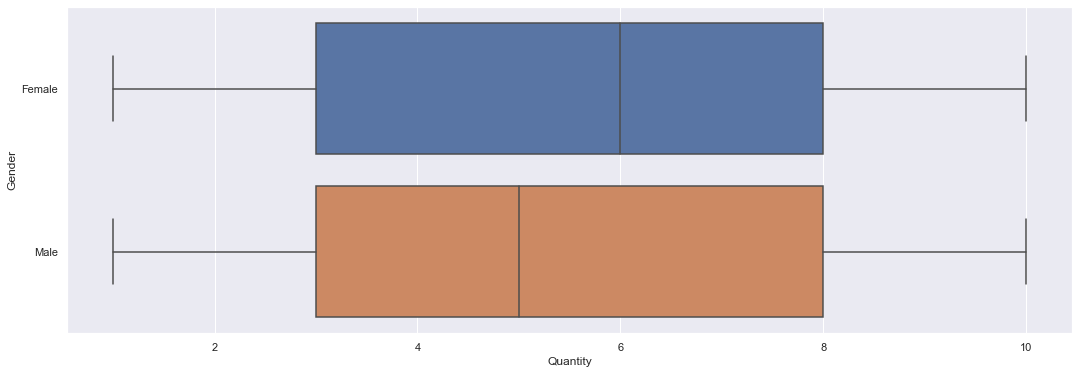

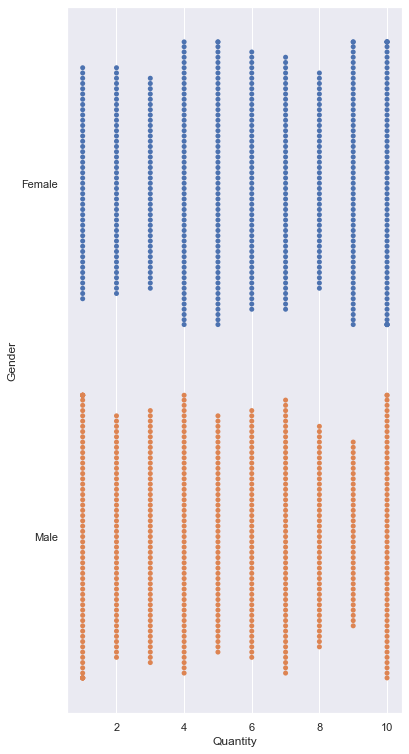

In [168]:
# Joint Boxplot of Quantity Train against Gender Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "Quantity", y = "Gender", data = quantityDF, orient = "h") #write x and y axis respectively
# Joint Swarmplot of Quantity Train against Gender Train
g = plt.figure(figsize=(6, 13))
sb.swarmplot(x ="Quantity", y = "Gender", data = quantityDF, orient = "h") #write x and y axis respectively

### Unit price Comparison between Males & Females

In [169]:
# Create a joint dataframe by concatenating Unit Price and Gender
unit_price = df1['Unit price']
gender = df1['Gender']
unit_priceDF = pd.concat([unit_price, gender], axis = 1).reindex(unit_price.index)

unit_priceDF.describe()

,Unit price
count,1000.000000
mean,55.672130
std,26.494628
min,10.080000
25%,32.875000
50%,55.230000
75%,77.935000
max,99.960000


<AxesSubplot:xlabel='Unit price', ylabel='Gender'>

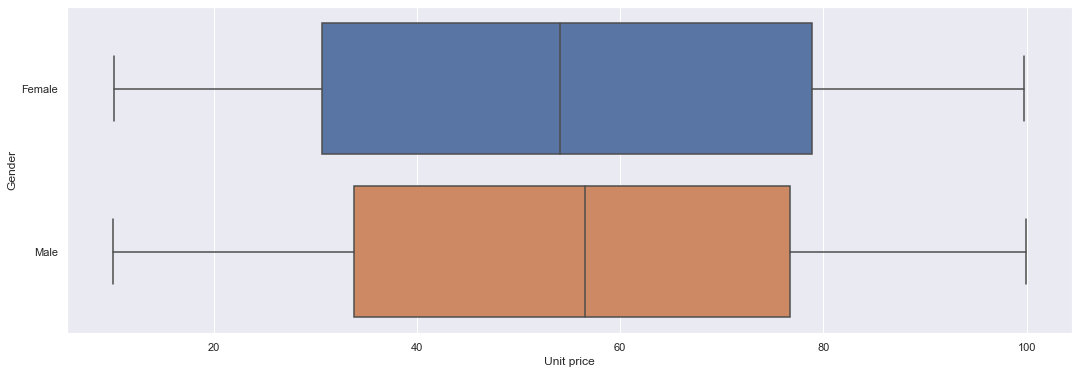

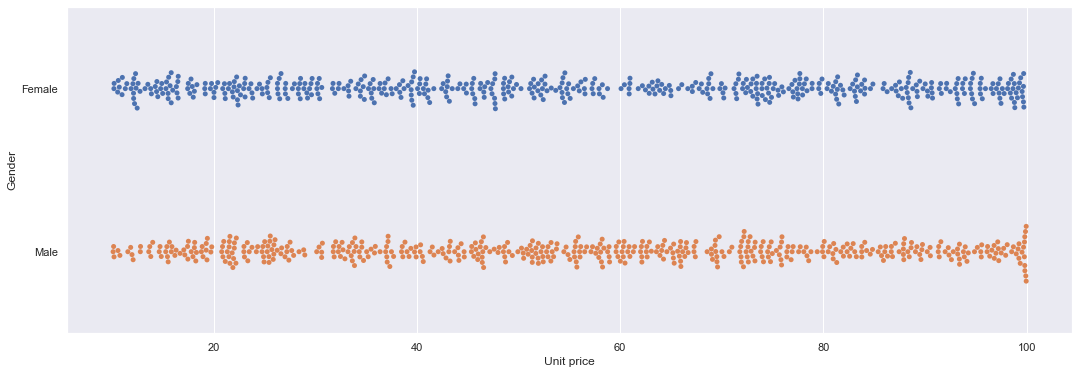

In [170]:
# Joint Boxplot of Unit Price Train against Gender Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "Unit price", y = "Gender", data = unit_priceDF, orient = "h") #write x and y axis respectively
# Joint Swarmplot of Unit Price Train against Gender Train
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x ="Unit price", y = "Gender", data = unit_priceDF, orient = "h") #write x and y axis respectively

# Start of Machine Learning

**Classification Tree with Random Train-Test Split**

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5866666666666667

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.564



<AxesSubplot:>

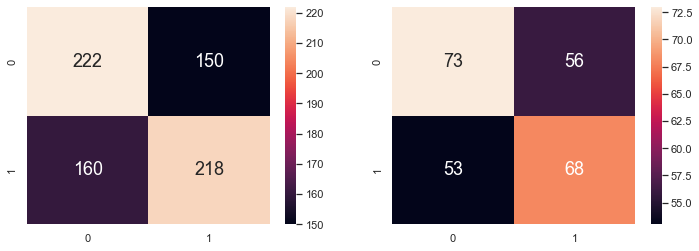

In [171]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Recall the Legendary-Total Dataset
gender = pd.DataFrame(df1['Gender'])   # Response
income = pd.DataFrame(df1['Total'])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(income, gender, test_size = 0.25) #in this case, x=total, y=legend
#x is written as capital X as it is a matrix with multiple varibles, whereas y is just a vector(single var)


# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(1069.5, 880.6320000000001, 'Total <= 297.454\ngini = 0.5\nsamples = 750\nvalue = [372, 378]\nclass = Male'),
 Text(604.5, 684.936, 'Total <= 259.224\ngini = 0.495\nsamples = 416\nvalue = [187, 229]\nclass = Male'),
 Text(372.0, 489.24, 'Total <= 215.591\ngini = 0.498\nsamples = 377\nvalue = [176, 201]\nclass = Male'),
 Text(186.0, 293.544, 'Total <= 34.913\ngini = 0.494\nsamples = 338\nvalue = [151, 187]\nclass = Male'),
 Text(93.0, 97.84800000000007, 'gini = 0.485\nsamples = 29\nvalue = [17, 12]\nclass = Female'),
 Text(279.0, 97.84800000000007, 'gini = 0.491\nsamples = 309\nvalue = [134, 175]\nclass = Male'),
 Text(558.0, 293.544, 'Total <= 243.453\ngini = 0.46\nsamples = 39\nvalue = [25, 14]\nclass = Female'),
 Text(465.0, 97.84800000000007, 'gini = 0.33\nsamples = 24\nvalue = [19, 5]\nclass = Female'),
 Text(651.0, 97.84800000000007, 'gini = 0.48\nsamples = 15\nvalue = [6, 9]\nclass = Male'),
 Text(837.0, 489.24, 'Total <= 266.994\ngini = 0.405\nsamples = 39\nvalue = [11, 28]

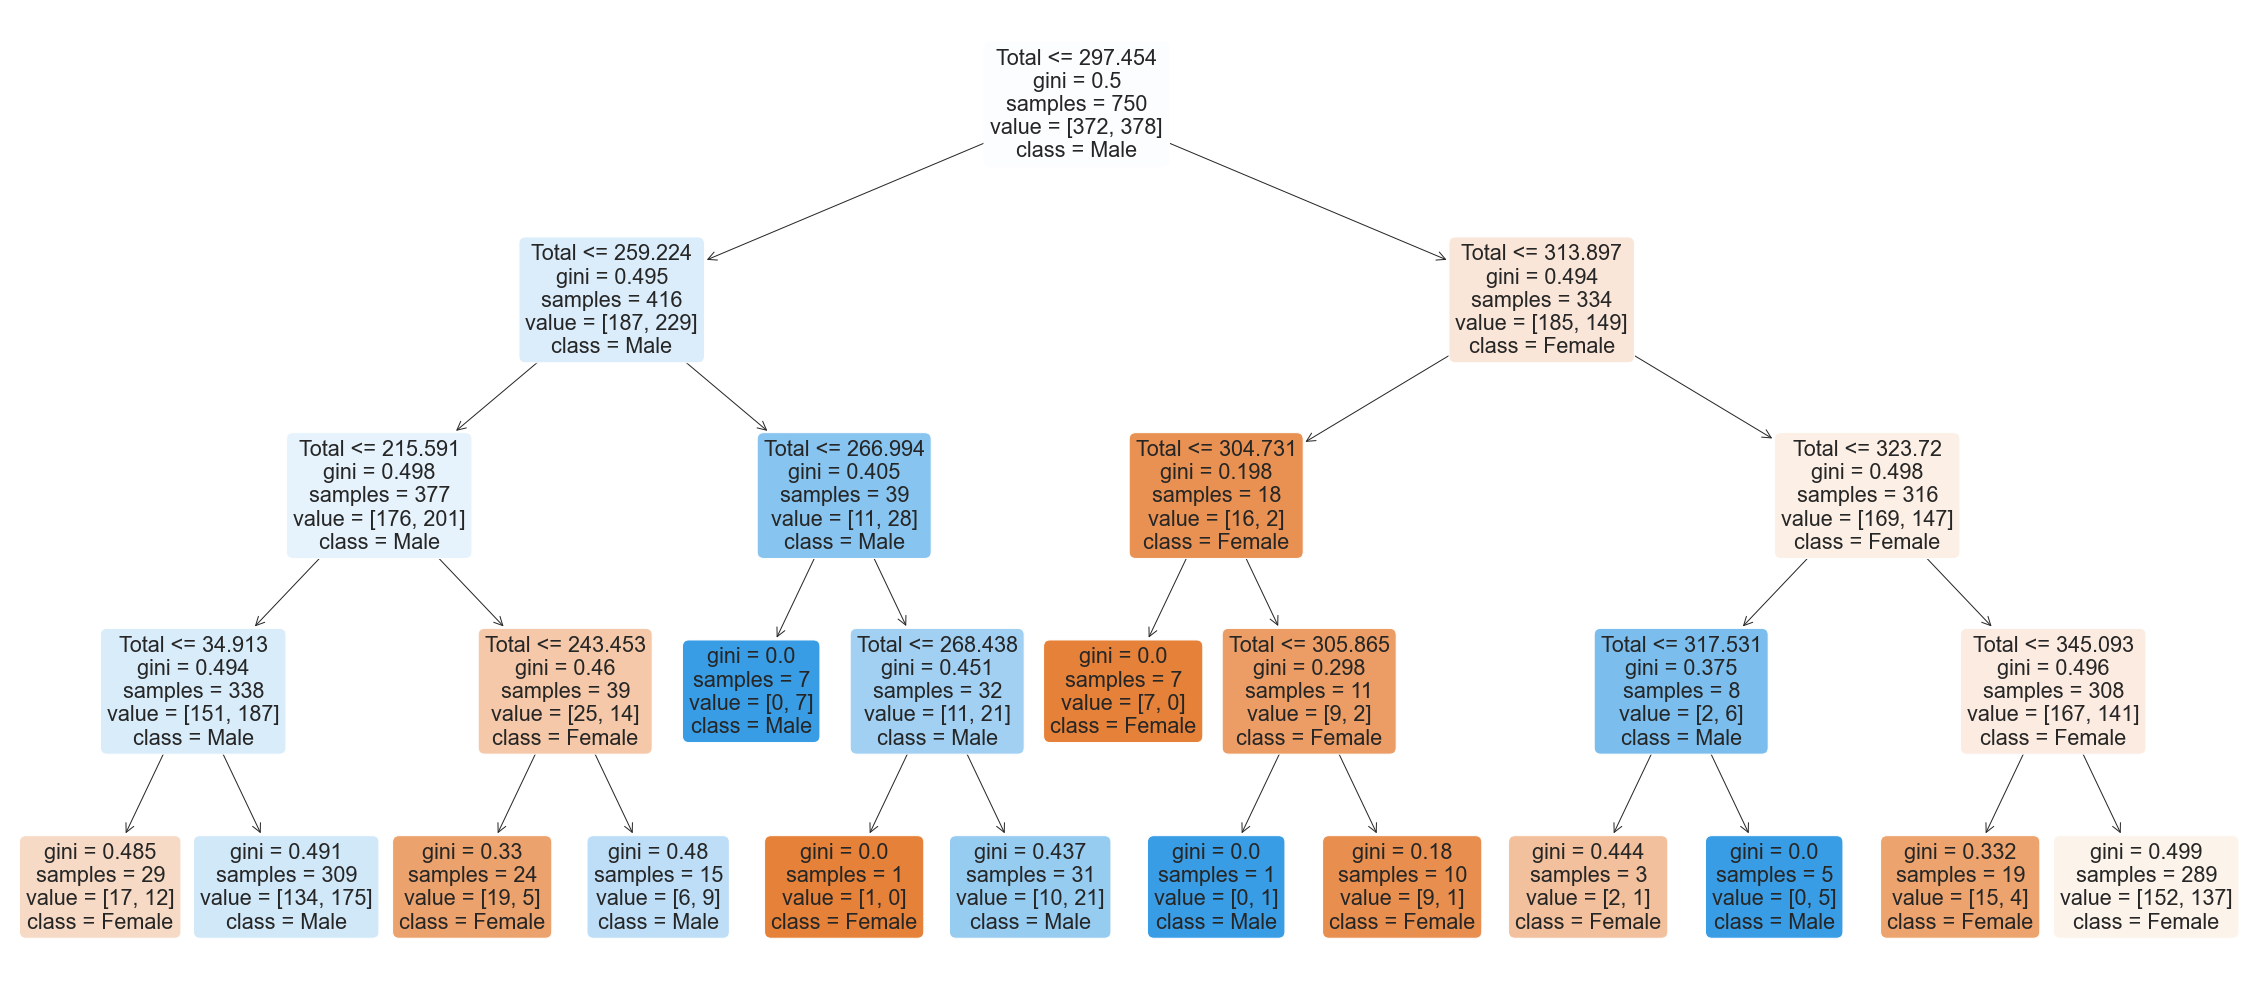

In [172]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(40,18))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Total"], 
          class_names=["Female","Male"])

# Multi-Variate Classification Tree

We will start by setting up a Multi-Variate Classification problem.   

Response Variable : **Gender**     
Predictor Feature : **Unit price, Quantity, Time, Total, Rating**       

Extract the variables and the associated data as a Pandas `DataFrame`.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.572

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.56



<AxesSubplot:>

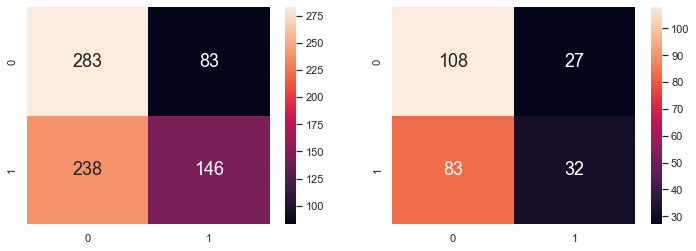

In [173]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["Unit price", "Quantity", "Time", "Total", "Rating"]

y = pd.DataFrame(df1['Gender']) #set the x and y values
X = pd.DataFrame(df1[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(1255.5, 880.6320000000001, 'Unit price <= 99.755\ngini = 0.5\nsamples = 750\nvalue = [366, 384]\nclass = Male'),
 Text(1116.0, 684.936, 'Time <= 11.292\ngini = 0.5\nsamples = 742\nvalue = [366, 376]\nclass = Male'),
 Text(558.0, 489.24, 'Unit price <= 48.765\ngini = 0.46\nsamples = 81\nvalue = [52, 29]\nclass = Female'),
 Text(279.0, 293.544, 'Time <= 10.275\ngini = 0.264\nsamples = 32\nvalue = [27, 5]\nclass = Female'),
 Text(139.5, 97.84800000000007, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = Female'),
 Text(418.5, 97.84800000000007, 'gini = 0.191\nsamples = 28\nvalue = [25, 3]\nclass = Female'),
 Text(837.0, 293.544, 'Unit price <= 79.255\ngini = 0.5\nsamples = 49\nvalue = [25, 24]\nclass = Female'),
 Text(697.5, 97.84800000000007, 'gini = 0.459\nsamples = 28\nvalue = [10, 18]\nclass = Male'),
 Text(976.5, 97.84800000000007, 'gini = 0.408\nsamples = 21\nvalue = [15, 6]\nclass = Female'),
 Text(1674.0, 489.24, 'Total <= 146.276\ngini = 0.499\nsamples = 661\nvalue = [314,

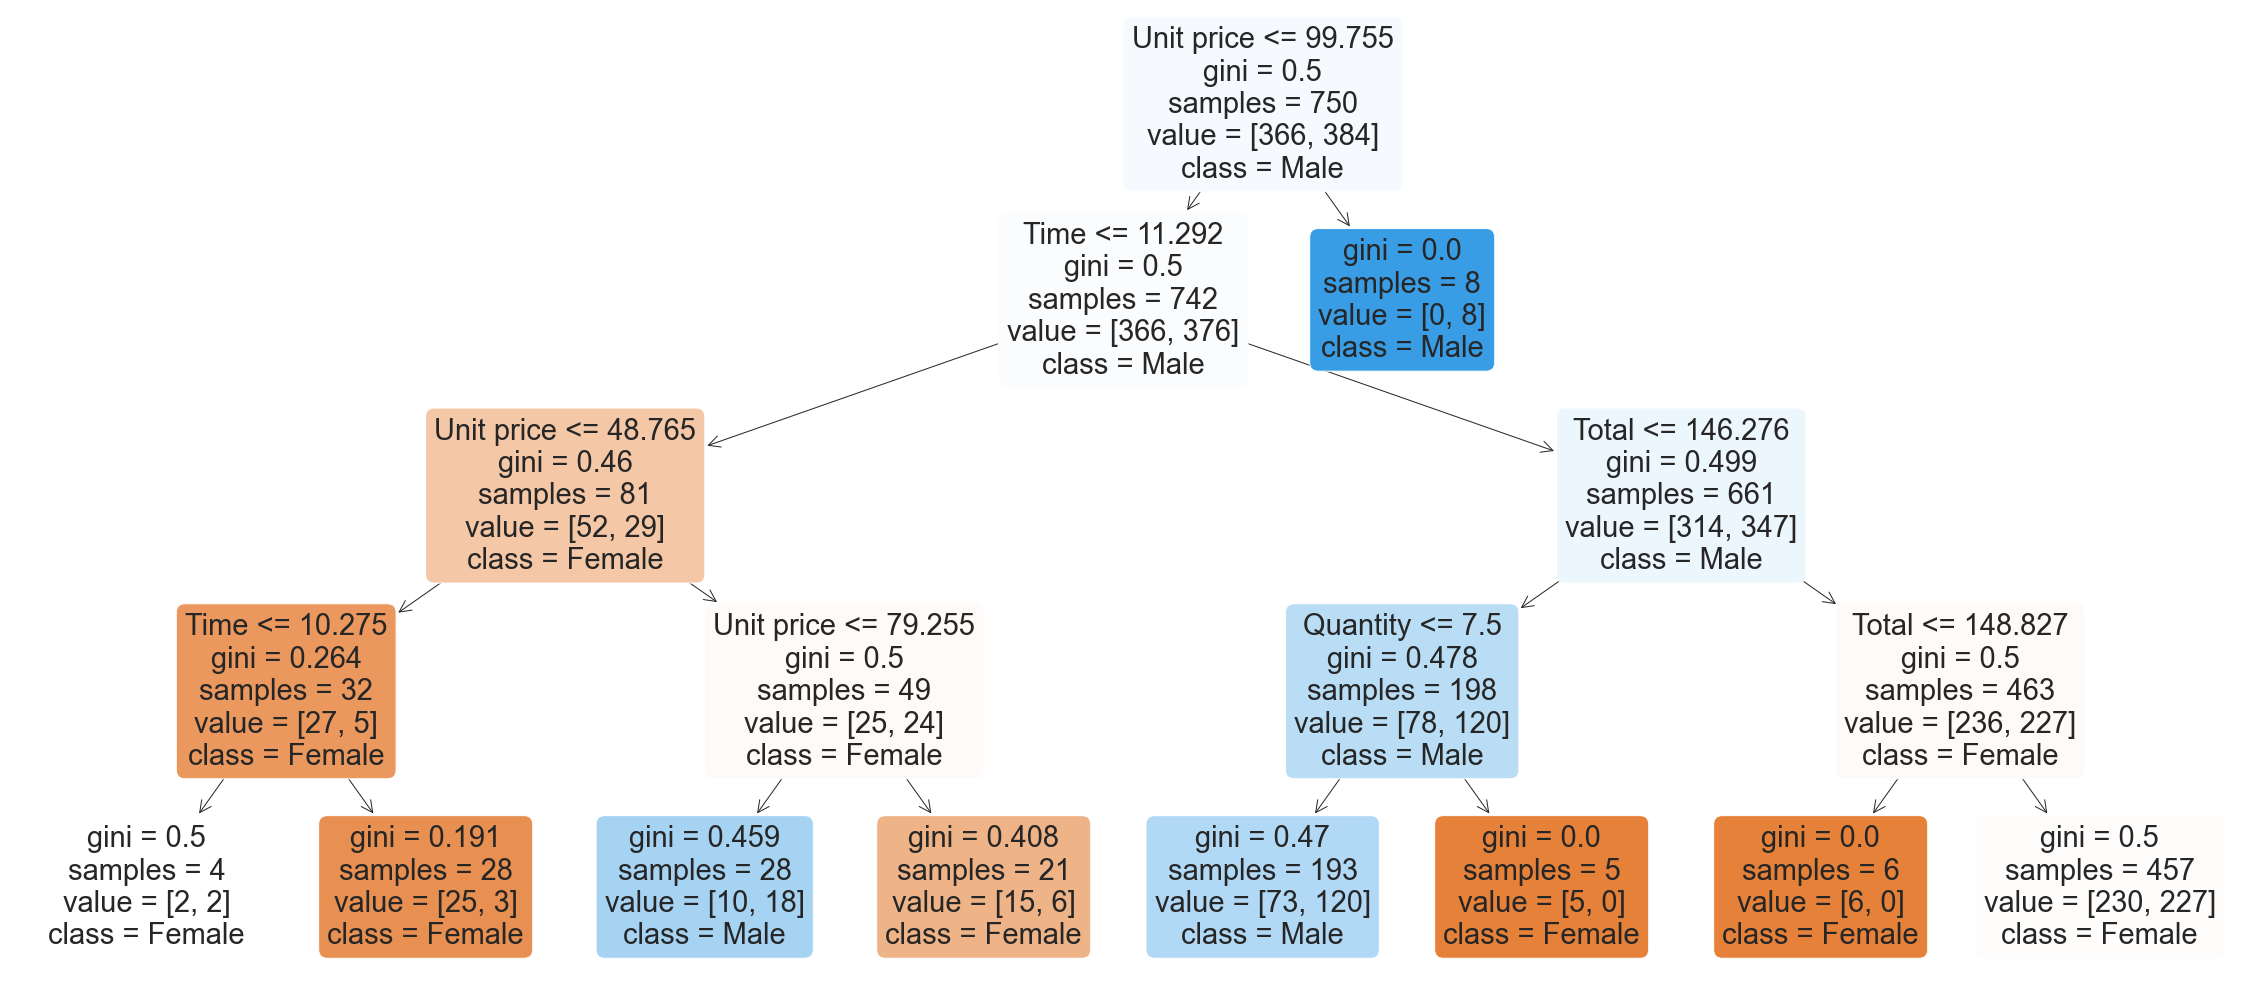

In [174]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(40,18))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Female","Male"])

# Prediction of Gender using above Classification Tree

Let's predict the value of **Gender** for a few customers -- using the Classification Tree derived above.   

In [175]:
df1_pred = df1[0:20]

In [176]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(df1_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = dectree.predict(X_pred)
y_pred

array(['Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male'],
      dtype=object)

In [177]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["PredGender"], index = df1_pred.index)
customer_acc = pd.concat([df1_pred[["Invoice ID", "Gender"]], y_pred], axis = 1)

customer_acc

,Invoice ID,Gender,PredGender
0,750-67-8428,Female,Female
1,226-31-3081,Female,Female
2,631-41-3108,Male,Female
3,123-19-1176,Male,Female
4,373-73-7910,Male,Female
5,699-14-3026,Male,Female
6,355-53-5943,Female,Female
7,315-22-5665,Female,Female
8,665-32-9167,Female,Male
9,692-92-5582,Female,Female


In [178]:
value = 0
for i in range(20):
    if(customer_acc["Gender"].loc[i] == customer_acc["PredGender"].loc[i]):
        value = value+1

accuracy = (value/20)*100
accuracy

50.0

# Random Forest

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.56

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.596



<AxesSubplot:>

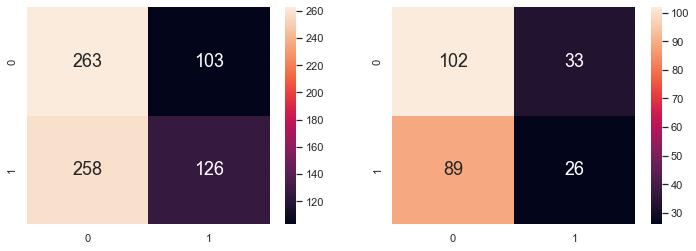

In [179]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
y = pd.DataFrame(df1['Gender']) #set the x and y values
X = pd.DataFrame(df1[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
rf.fit(X_train, y_train.values.ravel())
prediction_test = rf.predict(X=X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train.values.ravel()))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test.values.ravel()))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

**Compared to normal multi-variate classification tree, classification accuracy of Test Set using Random Forest Classifier is higher by 0.06 (from  0.53 to 0.59)**

# Prediction accuracy using categorical data (using one-hot encoding)

In [180]:
df1_category = df1[["City", "Customer type", "Product line", "Payment"]]

In [181]:
# one hot encode input variables
onehot_encoder = OneHotEncoder(sparse=False)
X = onehot_encoder.fit_transform(X)

In [182]:
# one-hot encode the breast cancer dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define the location of the dataset
# load the dataset
dataset = df1_category
# retrieve the array of data
data = dataset.values
# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)
# one hot encode input variables
onehot_encoder = OneHotEncoder(sparse=False)
X = onehot_encoder.fit_transform(X)
# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# summarize the transformed data
print('Input', X.shape)
print(X[:5, :])

Input (1000, 11)
[[0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.]]


In [183]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
# define the location of the dataset

# load the dataset
dataset = df1_category
# retrieve the array of data
data = dataset.values
# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# one-hot encode input variables
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
# define the model
model = LogisticRegression()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 38.50


**The accuracy of predicting male or female is much lower when only using categorical variables (38.50) compared to when using numerical variables (55.00). This indicates that the numerical variables have a stronger relationship with Gender, hence able to predict it more accurately.**

# Using both numerical & categorical variables in Classification Tree

In [184]:
df1['Customer_type'] = df1['Customer type']
df1['Product_line'] = df1['Product line']

payment_dummies = pd.get_dummies(df1.Payment, prefix='Payment')
df1 = pd.concat([df1, payment_dummies], axis=1)
city_dummies = pd.get_dummies(df1.City, prefix='City')
df1 = pd.concat([df1, city_dummies], axis=1)
customer_type_dummies = pd.get_dummies(df1.Customer_type, prefix='Customer_type')
df1 = pd.concat([df1, customer_type_dummies], axis=1)
product_line_dummies = pd.get_dummies(df1.Product_line, prefix='Product_line')
df1 = pd.concat([df1, product_line_dummies], axis=1)

In [185]:
df1.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Day,Time,...,City_Naypyitaw,City_Yangon,Customer_type_Member,Customer_type_Normal,Product_line_Electronic accessories,Product_line_Fashion accessories,Product_line_Food and beverages,Product_line_Health and beauty,Product_line_Home and lifestyle,Product_line_Sports and travel
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,5,13.133333,...,0,1,1,0,0,0,0,1,0,0
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,4,10.483333,...,1,0,0,1,1,0,0,0,0,0
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,6,13.383333,...,0,1,0,1,0,0,0,0,1,0
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,6,20.550000,...,0,1,1,0,0,0,0,1,0,0
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,4,10.616667,...,0,1,0,1,0,0,0,0,0,1


Response Variable : **Gender**     
Predictor Feature : **Unit price, Quantity, Time, Total, Rating, Day, Payment, Product line, City, Customer type**    

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.644

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.556



<AxesSubplot:>

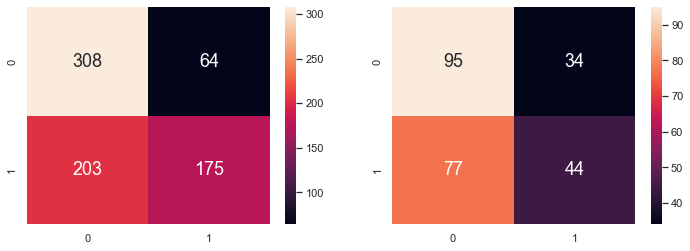

In [186]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ['Day', 'Payment_Cash', 'Payment_Credit card', 'Payment_Ewallet', 'City_Mandalay', 'City_Naypyitaw', 'City_Yangon', 'Customer_type_Member', 'Customer_type_Normal', 'Product_line_Electronic accessories', 'Product_line_Fashion accessories', 'Product_line_Food and beverages', 'Product_line_Health and beauty', 'Product_line_Home and lifestyle', 'Product_line_Sports and travel','Total','Time','Quantity','Rating','Unit price']

y = pd.DataFrame(df1['Gender']) #set the x and y values
X = pd.DataFrame(df1[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

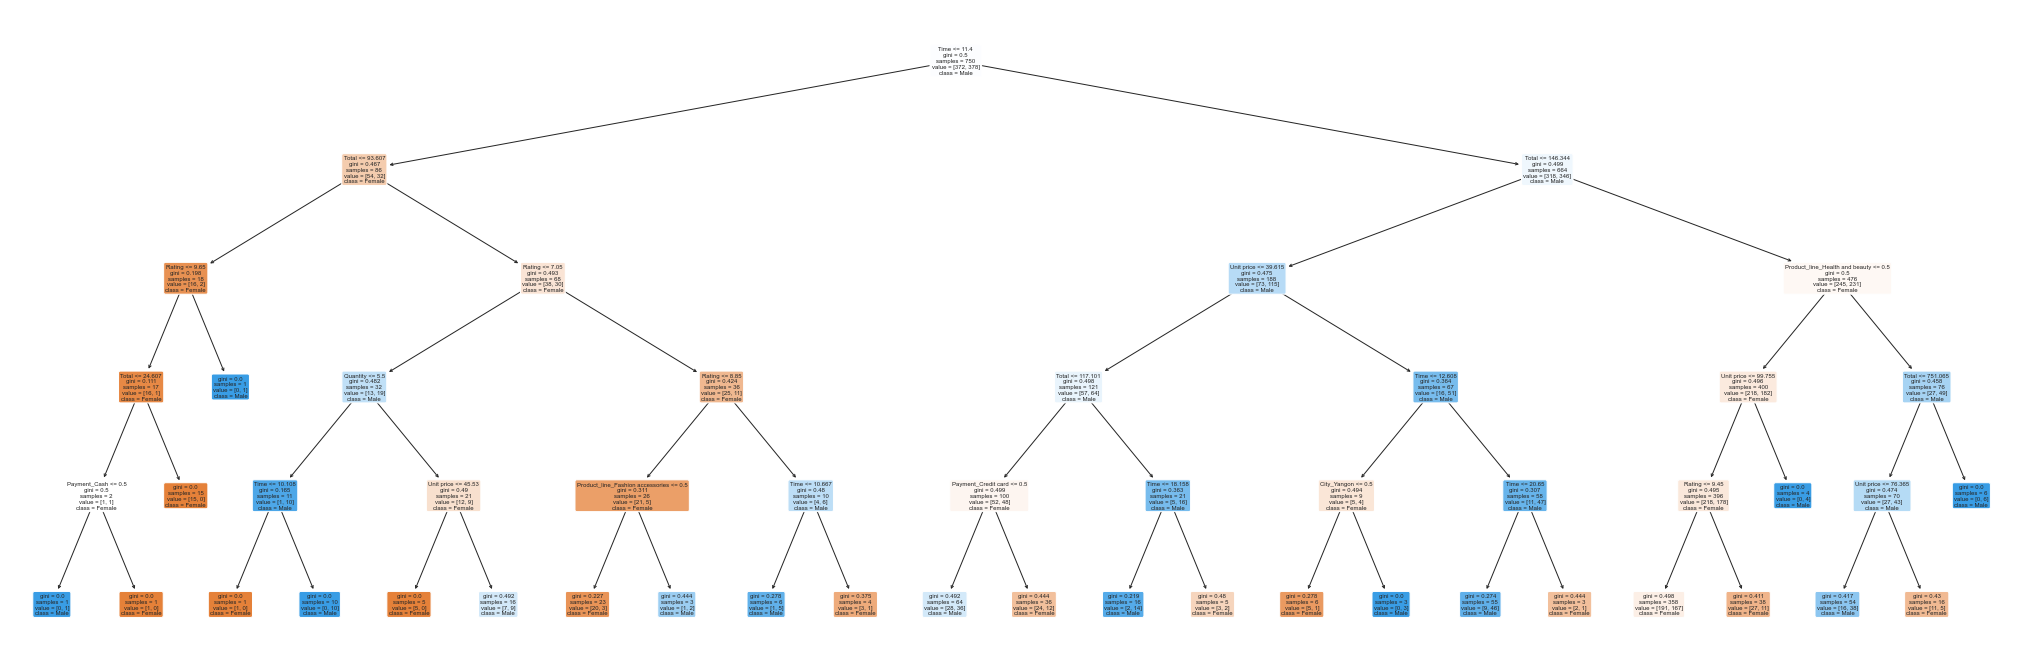

In [187]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(36,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, fontsize=6,
          class_names=["Female","Male"])
plt.savefig('tree_high_dpi', dpi=100)

The Classification Accuracy of the Classification Tree using both numerical & categorical datas are very similar. This shows that the additional categorical variables used are not much of help.

As mentioned before, the numerical variables have stronger correlation with gender. Hence, this may account for the similar Classification Accuracy. Observing the tree, the numerical variables are used most of the time due to its higher correlation and hence the accuracy is alike to the Classification Tree with solely numerical variables.

# Random Forest with One-hot encoding

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.64

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.568



<AxesSubplot:>

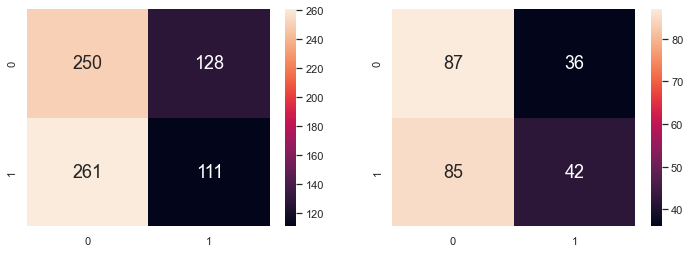

In [188]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
y = pd.DataFrame(df1['Gender']) #set the x and y values
X = pd.DataFrame(df1[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
rf.fit(X_train, y_train.values.ravel())
prediction_test = rf.predict(X=X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train.values.ravel()))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test.values.ravel()))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

We can see that after using the combination of Random Forest and one hot encoding feature, we are able to increase the accuracy of test data for some of the runs. This prove the usefulness of exploring other models other than keeping with just decision tree.